'/home/s2165793'

In [67]:
#import packages


#essentials
import pandas as pd
import numpy as np
import os
from Bio import SeqIO

#pairwise distances
import Levenshtein as lv

#clustering
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. Get sequences with metadata

In [11]:
#list all files containing the sequences (they should be fasta files)

fasta_files = [f for f in os.listdir() if f.endswith('.txt')] # list comprehension

fasta_files

['normalised.fulldataset_all_DC13_sequences_full-seq.noATS.txt']

In [12]:
#create table with the sequences and their IDs

from Bio import SeqIO

all_data = []

for fasta_file in fasta_files:

    records = list(SeqIO.parse(fasta_file, "fasta"))
    data = {'filename': os.path.basename(fasta_file),
            'sequence_id': [record.id for record in records],
           'sequence': [str(record.seq) for record in records]}
    all_data.append(pd.DataFrame(data))

start_df = pd.concat(all_data, ignore_index=True) #put the table in the correct format

start_df = start_df.sort_values(by='sequence_id') #sort values by sequence ID

start_df

,filename,sequence_id,sequence
473,normalised.fulldataset_all_DC13_sequences_full...,10668.g605,MGTGSSTPSVPKDVKNESHKSARNILEGFAKDIKRDVSNEAQKRAY...
474,normalised.fulldataset_all_DC13_sequences_full...,10936.g229,MGGNSSKGAPTYYTNESEKSARNVLENFAKDIKGKASNDAKKKGIS...
458,normalised.fulldataset_all_DC13_sequences_full...,3D7-1150400,MGNAIPATPDPIFINESYKSARNVLENVARLIKAKATKDVKRHRNV...
475,normalised.fulldataset_all_DC13_sequences_full...,6816.g324,MGGNSSKGAPTYYTNESEKSARNVLEGFAKDIRNKAENDAKKYASS...
476,normalised.fulldataset_all_DC13_sequences_full...,8383.g469,MGGNSSKVAPTYFTNESHNSTRNVLEGLAKGIKEDIYKNAKKKGSS...
...,...,...,...
2301,normalised.fulldataset_all_DC13_sequences_full...,SenT232.08.g335,MGGNSSKGAPTYYTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSS...
2302,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g324,SSKVAPTYFTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSSLKGN...
2303,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g420,MGGNASSFSKTVVGNETHKSARNILDVLAHDIRNKAENDAKNYASS...
2304,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g56,MGSSASKFSKTVVGNETHNSARNVLEKIALETKGDINVKANLYKDK...


In [17]:
#create table with the sequences and their IDs

from Bio import SeqIO

all_data = []

for fasta_file in fasta_files:

    records = list(SeqIO.parse(fasta_file, "fasta"))
    data = {'filename': os.path.basename(fasta_file),
            'sequence_id': [record.id for record in records],
           'sequence': [str(record.seq) for record in records]}
    all_data.append(pd.DataFrame(data))

start_df = pd.concat(all_data, ignore_index=True) #put the table in the correct format

start_df = start_df.sort_values(by='sequence_id') #sort values by sequence ID

start_df

,filename,sequence_id,sequence
473,normalised.fulldataset_all_DC13_sequences_full...,10668.g605,MGTGSSTPSVPKDVKNESHKSARNILEGFAKDIKRDVSNEAQKRAY...
474,normalised.fulldataset_all_DC13_sequences_full...,10936.g229,MGGNSSKGAPTYYTNESEKSARNVLENFAKDIKGKASNDAKKKGIS...
458,normalised.fulldataset_all_DC13_sequences_full...,3D7-1150400,MGNAIPATPDPIFINESYKSARNVLENVARLIKAKATKDVKRHRNV...
475,normalised.fulldataset_all_DC13_sequences_full...,6816.g324,MGGNSSKGAPTYYTNESEKSARNVLEGFAKDIRNKAENDAKKYASS...
476,normalised.fulldataset_all_DC13_sequences_full...,8383.g469,MGGNSSKVAPTYFTNESHNSTRNVLEGLAKGIKEDIYKNAKKKGSS...
...,...,...,...
2301,normalised.fulldataset_all_DC13_sequences_full...,SenT232.08.g335,MGGNSSKGAPTYYTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSS...
2302,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g324,SSKVAPTYFTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSSLKGN...
2303,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g420,MGGNASSFSKTVVGNETHKSARNILDVLAHDIRNKAENDAKNYASS...
2304,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g56,MGSSASKFSKTVVGNETHNSARNVLEKIALETKGDINVKANLYKDK...


In [30]:
#create a table for the metadata 


metadata_df = pd.read_csv("normalised.fulldataset.DC13_metadata_genes.csv").sort_values(by='Sample_ID') 

metadata_df = metadata_df.rename(columns={'Sample_ID': 'sequence_id'}) #should match the column from start_df

metadata_df.rename(columns={'updated_arc':'domain_structure', 'updated_Subtype':'Subtype'}, inplace=True) 
metadata_df

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,domain_structure,Subtype
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,head structure with DBLb1
1,10936.g229,10936,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb3-DBLb9-DBLg11-DBLg9-DBLd...,head structure with DBLb3
2,3D7-1150400,3D7,NaN,NaN,NaN,1987.0,GCA_000002765,PlasmoDB,Africa,DBLa1.7-CIDRa1.4-DBLb3-DBLb6-DBLd3-CIDRg2,head structure with DBLb3
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,head structure with DBLb1
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,head structure with DBLb1
...,...,...,...,...,...,...,...,...,...,...,...
2301,SenT232.08.g335,SenT232.08,Broad Senegal,Senegal,Thies,2008.0,SRS119084,varDB,Africa,DBLa1.7-CIDRa1.4-DBLg11-DBLb7-DBLg11-DBLd1-CIDRb5,head structure with DBLg11
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,head structure with DBLb1
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,head structure with DBLb1
2304,SenV042.05.g56,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLd5-CIDRb4,head structure with DBLb1


In [48]:

#  Merge the two tables
df_metadata = start_df.merge(metadata_df, on='sequence_id', how='inner')
structure_df = pd.read_csv('normalised.fulldataset.all_DC13_matched_pattern.csv')

# Print the columns of df_metadata and structure_df for inspection
print("Columns in df_metadata:", df_metadata.columns)
print("Columns in structure_df:", structure_df.columns)

# Merge the dataframes
df = metadata_df.merge(start_df, on='sequence_id', how='inner')

#  Print the columns and a few rows to check if 'domain_structure' exists after the merge
print("Columns after merge:", df.columns)
print("First few rows after merge:\n", df.head())

# Function to count the number of domains
def count_domains(domain_structure):
    if not domain_structure:
        return 0  # Handle empty domain structures
    domains = [domain for domain in domain_structure.split('-') if domain]
    return len(domains)

# Check if 'domain_structure' exists and apply the domain counting function
if 'domain_structure' in df.columns:
    df['domain_count'] = df['domain_structure'].apply(count_domains)
else:
    print("Error: 'domain_structure' column not found in the DataFrame!")

# Filter out rows where domain_count <= 3
df_filtered = df[(df['domain_count'] > 4) & (df['domain_count'] <11)]

# Print the number of rows before and after filtering
print(f"Rows before filtering: {len(df)}")
print(f"Rows after filtering: {len(df_filtered)}")
df_filtered = df_filtered.iloc[:1837]  # Keep only the first 1837 rows


# Save the filtered DataFrame to a CSV file
df_filtered.to_csv("df_filtered.csv")

# Print the filtered DataFrame 
df_filtered



Columns in df_metadata: Index(['filename', 'sequence_id', 'sequence', 'Genome', 'Study', 'Country',
       'Region', 'Year', 'Accession', 'Database', 'Continent',
       'domain_structure', 'Subtype'],
      dtype='object')
Columns in structure_df: Index(['sequence_id', 'domain_structure'], dtype='object')
Columns after merge: Index(['sequence_id', 'Genome', 'Study', 'Country', 'Region', 'Year',
       'Accession', 'Database', 'Continent', 'domain_structure', 'Subtype',
       'filename', 'sequence'],
      dtype='object')
First few rows after merge:
    sequence_id Genome Study Country Region    Year      Accession  Database  \
0   10668.g605  10668   NaN   Kenya    NaN     NaN      ERS166381     varDB   
1   10936.g229  10936   NaN   Kenya    NaN     NaN      ERS166381     varDB   
2  3D7-1150400    3D7   NaN     NaN    NaN  1987.0  GCA_000002765  PlasmoDB   
3    6816.g324   6816   NaN   Kenya    NaN     NaN      ERS166381     varDB   
4    8383.g469   8383   NaN   Kenya    NaN     

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,domain_structure,Subtype,filename,sequence,domain_count
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGTGSSTPSVPKDVKNESHKSARNILEGFAKDIKRDVSNEAQKRAY...,6
1,10936.g229,10936,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb3-DBLb9-DBLg11-DBLg9-DBLd...,head structure with DBLb3,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESEKSARNVLENFAKDIKGKASNDAKKKGIS...,8
2,3D7-1150400,3D7,NaN,NaN,NaN,1987.0,GCA_000002765,PlasmoDB,Africa,DBLa1.7-CIDRa1.4-DBLb3-DBLb6-DBLd3-CIDRg2,head structure with DBLb3,normalised.fulldataset_all_DC13_sequences_full...,MGNAIPATPDPIFINESYKSARNVLENVARLIKAKATKDVKRHRNV...,6
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESEKSARNVLEGFAKDIRNKAENDAKKYASS...,8
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKVAPTYFTNESHNSTRNVLEGLAKGIKEDIYKNAKKKGSS...,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGTGSSTPSVPKDVKNESHKSARNVLDVLAEDIKKQAENKAQKHAR...,8
2300,SenT231.08.g353,SenT231.08,Broad Senegal,Senegal,Thies,2008.0,SRS119078,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb3-DBLg11-DBLg2-DBLd1-CIDRb5,head structure with DBLb3,normalised.fulldataset_all_DC13_sequences_full...,MGNAIPATPDPIFINESHKSARNVLENIGRKIKDIASKDEIKYINF...,7
2301,SenT232.08.g335,SenT232.08,Broad Senegal,Senegal,Thies,2008.0,SRS119084,varDB,Africa,DBLa1.7-CIDRa1.4-DBLg11-DBLb7-DBLg11-DBLd1-CIDRb5,head structure with DBLg11,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSS...,7
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,SSKVAPTYFTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSSLKGN...,8


## 2. Create the Levenshtein matrix

In [32]:
#extract sequence info from the table
sequence_dict = dict(zip(df_filtered['sequence_id'], df_filtered['sequence'])) #create a dictionary which assigns each sequence to its sequence ID
sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences

#create Levenshtein distance matrix
n = len(sequences)
lev_matrix = [[lv.distance(sequences[i], sequences[j]) for j in range(n)] for i in range(n)]
lev_matrix=pd.DataFrame(lev_matrix)

lev_matrix.to_csv("DC13_lev_matrix.csv", index=False)

In [10]:
dfcheck=pd.read_csv("DC13_lev_matrix.csv")
dfcheck
df_filtered

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6
1,10936.g229,10936,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb3,DBLa1.7-CIDRa1.4-DBLb3-DBLb9-DBLg11-DBLg9-DBLd...,8
2,3D7-1150400,NaN,NaN,NaN,NaN,1987.0,GCA_000002765,PlasmoDB,Africa,head structure with DBLb3,DBLa1.7-CIDRa1.4-DBLb3-DBLb6-DBLd3-CIDRg2-,6
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2301,SenT232.08.g335,SenT232.08,Broad Senegal,Senegal,Thies,2008.0,SRS119084,varDB,Africa,head structure with DBLg11,DBLa1.7-CIDRa1.4-DBLg11-DBLb7-DBLg11-DBLd1-CIDRb5,7
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7
2304,SenV042.05.g56,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLd5-CIDRb4,6


In [39]:
sequence_dict = dict(zip(df_filtered['sequence_id'], df_filtered['sequence'])) #create a dictionary which assigns each sequence to its sequence ID

sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values())

len(sequence_ids)


1837

In [41]:
#assign sequence IDs to columns and rows in the matrix

lev_matrix = pd.read_csv("DC13_lev_matrix.csv")
sequence_dict = dict(zip(df_filtered['sequence_id'], df_filtered['sequence'])) #create a dictionary which assigns each sequence to its sequence ID

sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences
 



lev_matrix.columns = sequence_ids
lev_matrix.index = sequence_ids

#save the matrix


lev_matrix.to_csv("DC13_lev_matrix_id.csv", index=False)

## 3. Explore data with heatmaps and preliminary clustering plots

/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 800x600 with 0 Axes>

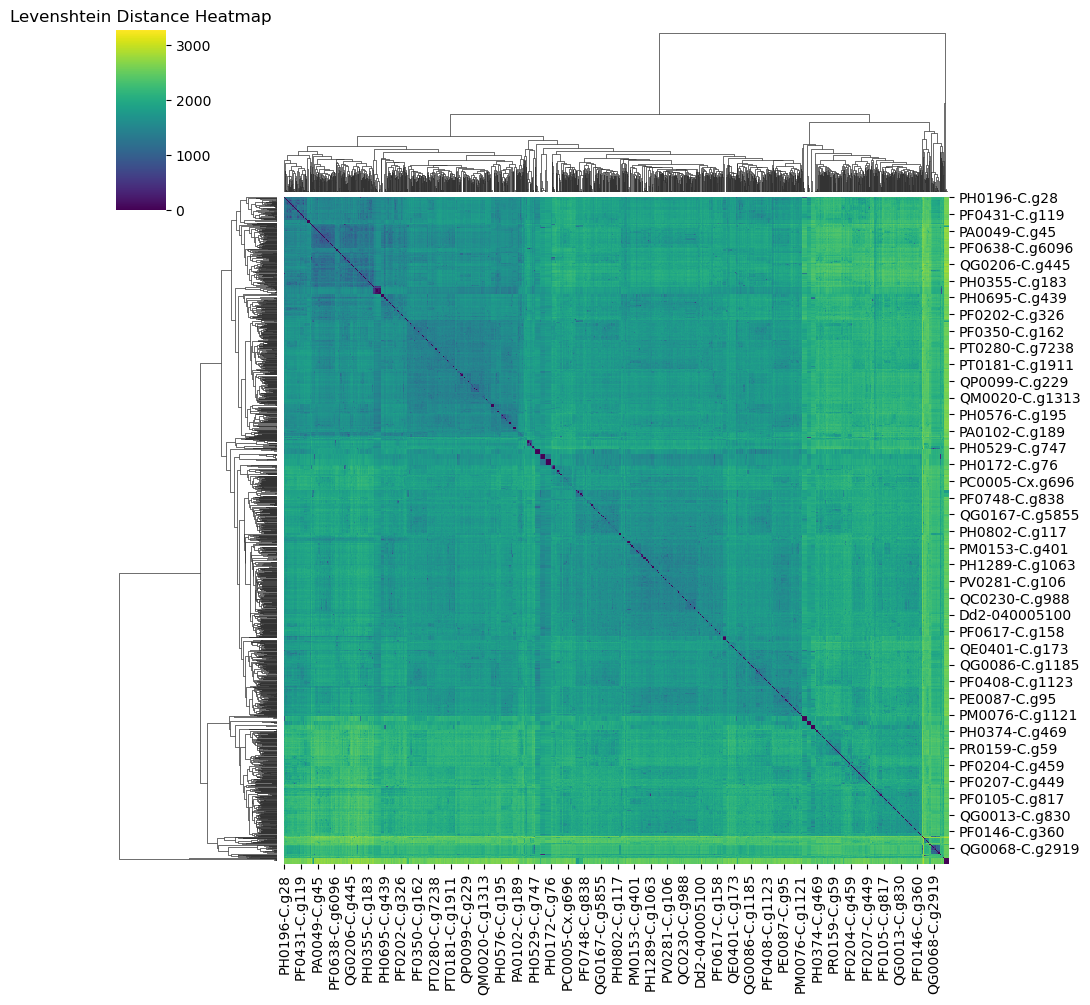

In [42]:
# Plot a clustermap of the Levenshtein distance matrix

plt.figure(figsize=(8, 6))

sns.clustermap(lev_matrix, cmap='viridis')
plt.title("Levenshtein Distance Heatmap")

plt.savefig("heatmap_clustered.png")
plt.show()


In [61]:
# Trying to see if normalising Lev distances will improve data quality

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


scaler = MinMaxScaler()
lev_matrix_Scaled = scaler.fit_transform(lev_matrix)
lev_matrix_Scaled = (lev_matrix_Scaled + lev_matrix_Scaled.T) / 2

is_symmetric = np.allclose(lev_matrix_Scaled, lev_matrix_Scaled.T, atol=1e-8)


lev_matrix_normalised = zscore(lev_matrix, axis = None)

print(lev_matrix_Scaled)
print(is_symmetric)

[[0.         0.78223342 0.54541941 ... 0.64202335 0.78863469 0.63896619]
 [0.78223342 0.         0.79628637 ... 0.64556475 0.68555724 0.6912986 ]
 [0.54541941 0.79628637 0.         ... 0.62827387 0.78027093 0.62845577]
 ...
 [0.64202335 0.64556475 0.62827387 ... 0.         0.70241153 0.52340889]
 [0.78863469 0.68555724 0.78027093 ... 0.70241153 0.         0.73228752]
 [0.63896619 0.6912986  0.62845577 ... 0.52340889 0.73228752 0.        ]]
True


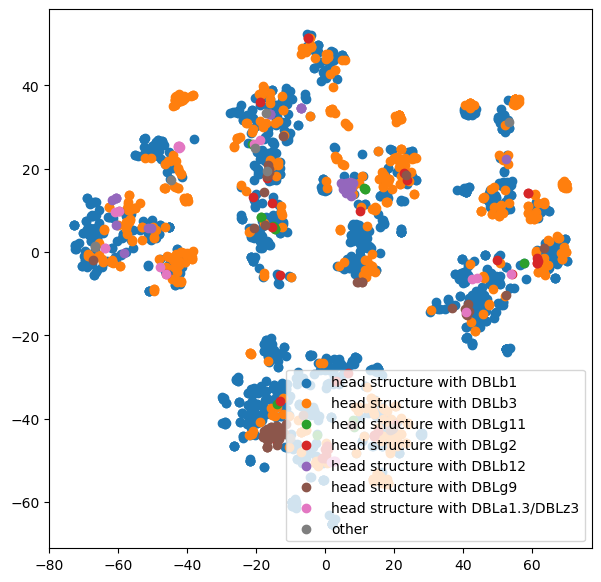

In [53]:
# t-SNE plot
tsne = TSNE(n_components=2, random_state=42) 
tsne_results = tsne.fit_transform(lev_matrix_normalised)

plt.figure(figsize=(7, 7))

#add labels (for different groups, can replace 'DC11_subtype' with any variable you are interested in)
for label in df_filtered['Subtype'].unique():
    index = (df_filtered['Subtype'] == label) 
    plt.scatter(tsne_results[index, 0], tsne_results[index, 1], label=label)

plt.legend()

plt.savefig("tSNE_plot.png")
plt.show()



Stress: 729680056811.3442


/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


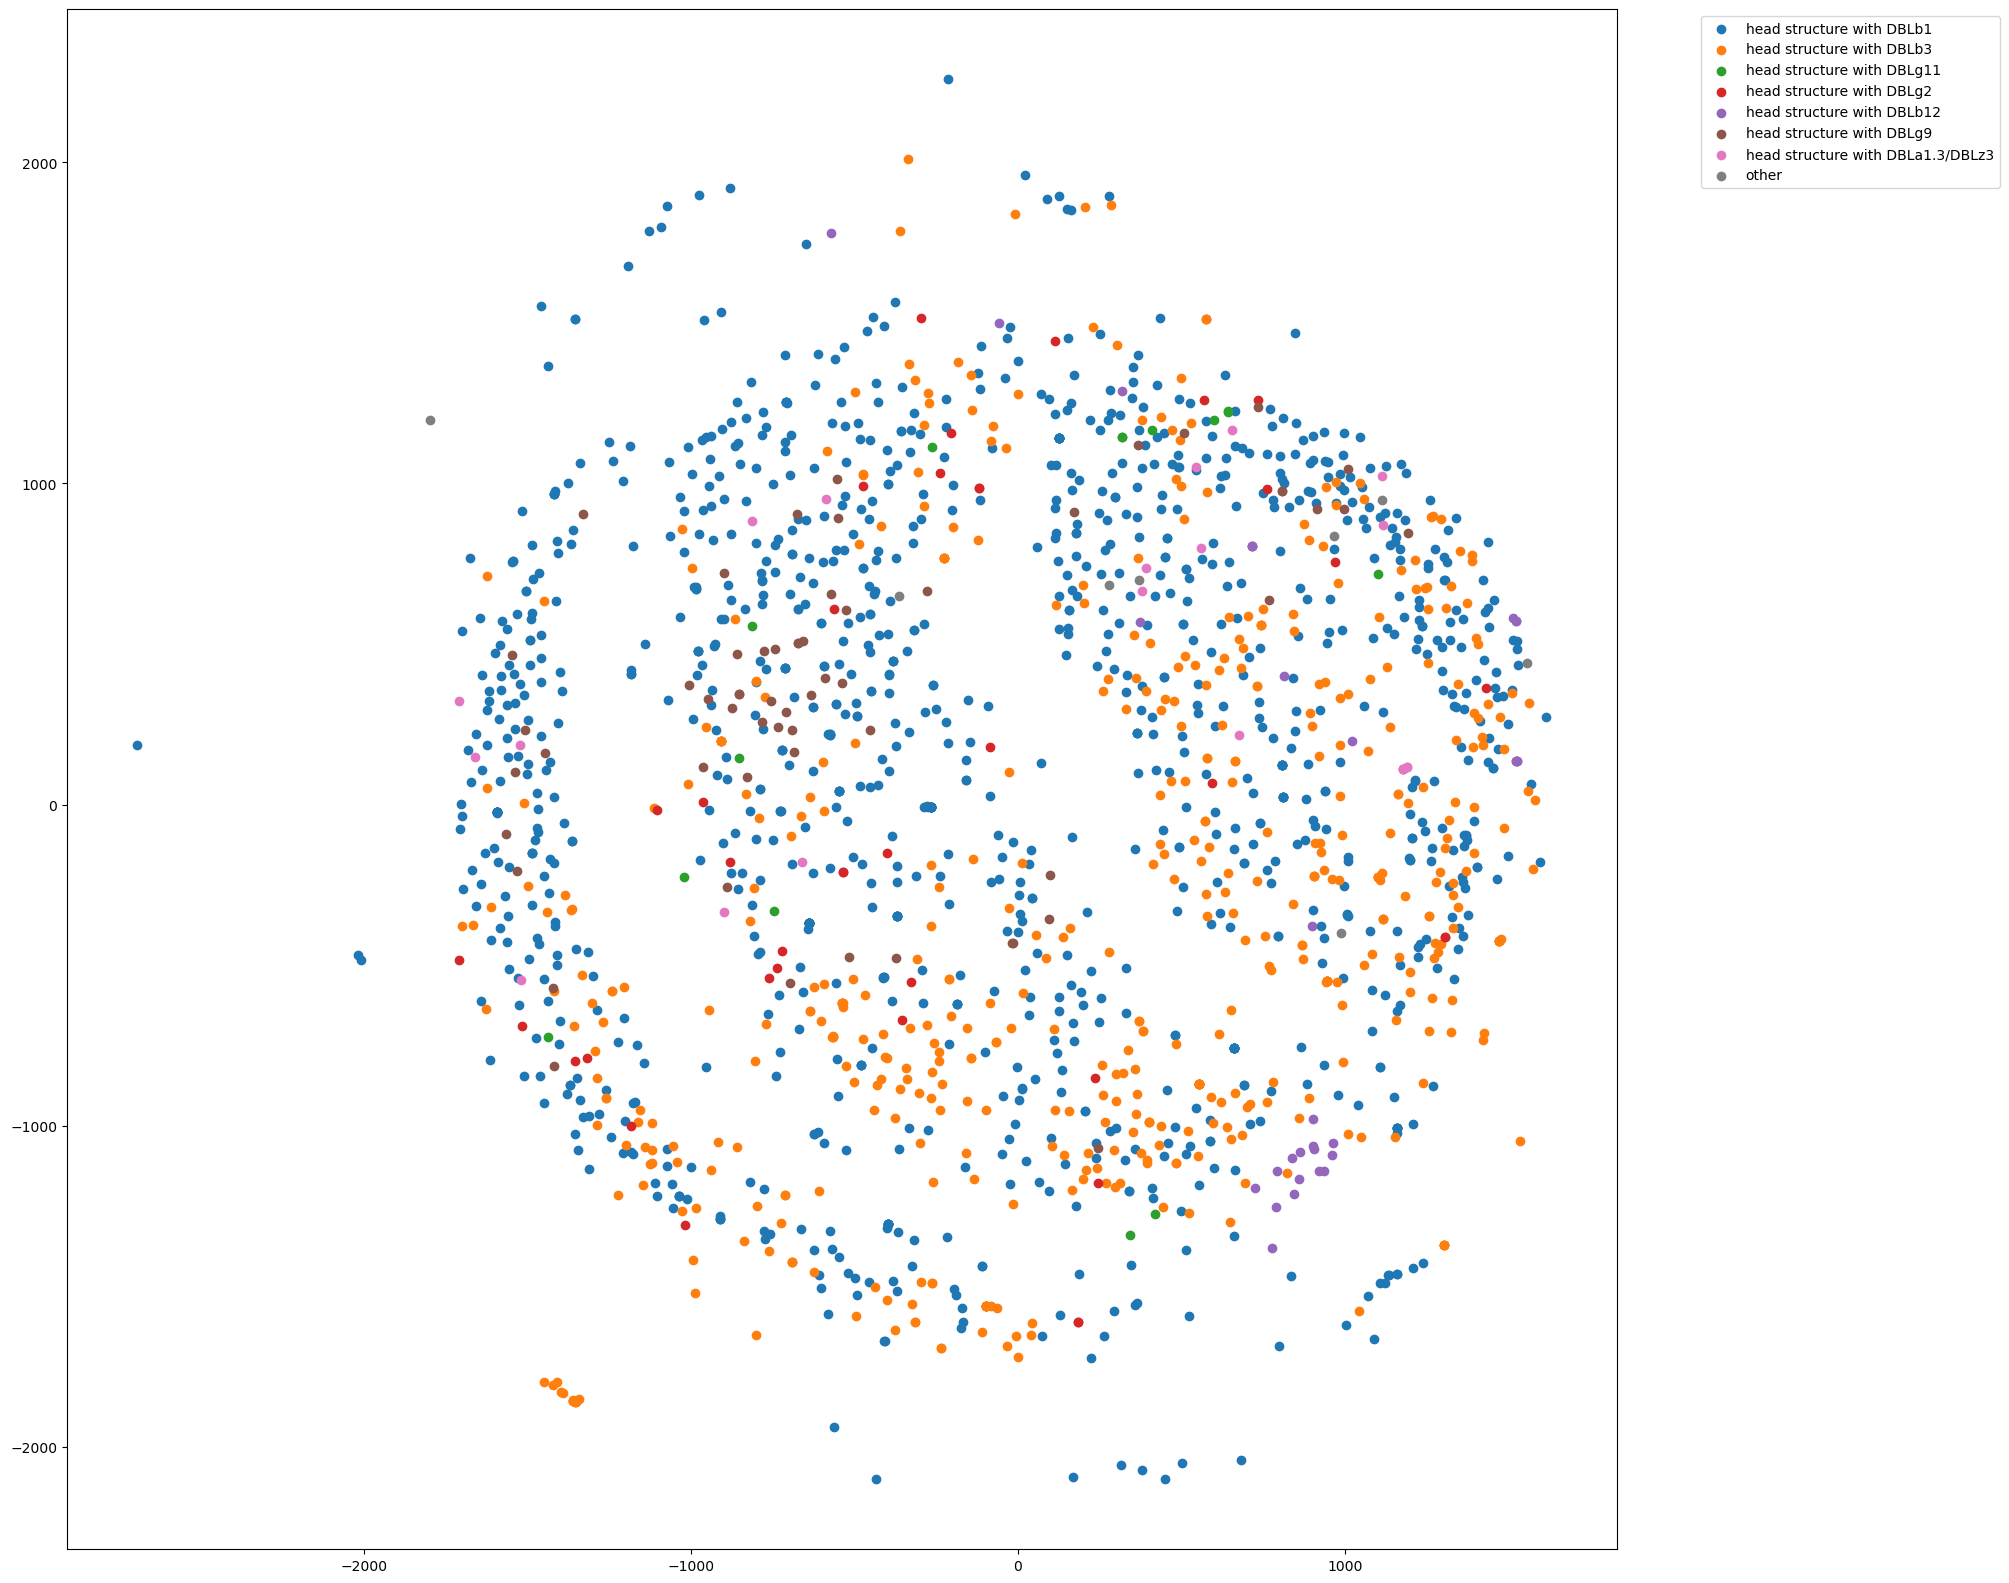

In [46]:
# MDS plot
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed',n_jobs=1, n_init = 50, max_iter=500) #n_copmonents designates the number of dimensions, random_state should always be set to the same number (e.g. 42) to ensure the results are reproducible, keep dissimilarity='precomputed' when using Levenshtein distances
mds_results = mds.fit_transform(lev_matrix)

plt.figure(figsize=(20, 20))

#add labels (for different groups, can replace 'DC11_subtype' with any variable you are interested in)
for label in df_filtered['Subtype'].unique():
    index = (df_filtered['Subtype'] == label) 
    plt.scatter(mds_results[index, 0], mds_results[index, 1], label=label)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

print(f"Stress: {mds.stress_}") # Raw stress value -> needs to be below .1 

# Calculating R2 value - measure of dissimilarity as compared to below 
stress = mds.stress_
stress_max = np.sum(lev_matrix**2)
r_square = 1 - (stress / stress_max) 

plt.savefig("DC13_2D_MDS_plot.png")
plt.show()

In [ ]:
# MDS plot
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed',n_jobs=1, n_init = 200, max_iter=1000) #n_copmonents designates the number of dimensions, random_state should always be set to the same number (e.g. 42) to ensure the results are reproducible, keep dissimilarity='precomputed' when using Levenshtein distances
mds_results = mds.fit_transform(lev_matrix_Scaled)

plt.figure(figsize=(20, 20))

#add labels (for different groups, can replace 'DC11_subtype' with any variable you are interested in)
for label in df_filtered['Subtype'].unique():
    index = (df_filtered['Subtype'] == label) 
    plt.scatter(mds_results[index, 0], mds_results[index, 1], label=label)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

print(f"Stress: {mds.stress_}") # Raw stress value -> needs to be below .1 

# Calculating R2 value - measure of dissimilarity as compared to below 
stress = mds.stress_
stress_max = np.sum(lev_matrix**2)
r_square = 1 - (stress / stress_max) 

plt.savefig("DC13_2D_MDS_Normalised_plot.png")
plt.show()

In [65]:
print(r_square)

10668.g605         1.0
10936.g229         1.0
3D7-1150400        1.0
6816.g324          1.0
8383.g469          1.0
                  ... 
SenT230.08.g292    1.0
SenT231.08.g353    1.0
SenT232.08.g335    1.0
SenV042.05.g324    1.0
SenV042.05.g420    1.0
Length: 1837, dtype: float64


## 4. Create MDS plots

In [29]:
lev_matrix= pd.read_csv('lev_matrix_id.csv', index_col=0)

In [31]:
#calculate coordinates for 3D MDS plot 
#this might take a while depending on how many sequences you have

#create a new table for the MDS coordinates 

mds_df = pd.DataFrame(df_filtered['sequence_id']).sort_index() #we'll keep the sequence IDs from the df table

#3D coordinates
mds_3d = MDS(n_components=3, random_state=42, dissimilarity='precomputed',n_jobs=-1, n_init = 20, max_iter=200) 

mds_results_3d = mds_3d.fit_transform(lev_matrix)

mds_df['mds_3d']=mds_results_3d.tolist()
mds_df['mds_3d_x']=mds_df['mds_3d'].apply(lambda a: a[0]) #take out the 1st coordinate
mds_df['mds_3d_y']=mds_df['mds_3d'].apply(lambda b: b[1]) #take out the 2nd coordinate
mds_df['mds_3d_z']=mds_df['mds_3d'].apply(lambda c: c[2]) #take out the 3rd coordinate

mds_df.to_csv("mds3d_Full_DC13.csv", index=True)

In [32]:
import pandas as pd
from sklearn.manifold import MDS

# Load the matrix
lev_matrix = pd.read_csv("lev_matrix_id.csv", index_col=0)

# Ensure the matrix is square
if lev_matrix.shape[0] != lev_matrix.shape[1]:
    raise ValueError(f"lev_matrix must be square! Current shape: {lev_matrix.shape}")

# Convert to NumPy array
lev_matrix_np = lev_matrix.to_numpy()




# Load original DataFrame and ensure correct slicing



# Store MDS results in DataFrame
mds_3d = pd.DataFrame({
    'sequence_id': mds_3d['sequence_id'].values,  # Ensure column is retained
    'mds_3d_x': mds_results_3d[:, 0],  # X coordinate
    'mds_3d_y': mds_results_3d[:, 1],  # Y coordinate
    'mds_3d_z': mds_results_3d[:, 2],  # Z coordinate
})

# Display the final DataFrame
print(test_mds_df)  # This will now be a properly formatted DataFrame



TypeError: 'MDS' object is not subscriptable

In [66]:
#merge the MDS coordinates with our df
merged_df = df_filtered.merge(mds_df, on="sequence_id", how='right')
merged_df_sequences = merged_df.merge(start_df, on="sequence_id", how='right')

merged_df_sequences 

#save merged df
merged_df_sequences.to_csv("fullDC13_merged_df.csv")


NameError: name 'mds_df' is not defined

In [56]:
#create 3D MDS plot
test_merged_df = pd.read_csv("fullDC13_merged_df.csv")

fig = px.scatter_3d(test_merged_df, x="mds_3d_x", y="mds_3d_y", z="mds_3d_z",  hover_data=['sequence_id'], color = "Subtype",
                    color_discrete_sequence=px.colors.qualitative.Set1)


#choose camera angles (this is the view that will be used to save the image later)
camera = dict(
    eye=dict(x=1.25, y=1.25, z=0.5)
)

#change the appearance of the plot  
fig.update_layout(
width=1000,
height=700,
template='plotly_white',
scene=dict(
    aspectmode='cube'),
scene_camera=camera)

#change the data point size
fig.update_traces(marker_size=6)

#fig.write_image("MDS_3D_plot.png", width=1000, height=800, scale=3)
fig.show()



In [47]:
identical_seq_counts = merged_df_sequences.sequence.value_counts()

In [49]:
identical_seq_df = pd.DataFrame(identical_seq_counts).reset_index()
identical_seq_df = identical_seq_df.merge(merged_df_sequences,on = "sequence", how = "left")
identical_seq_df = identical_seq_df[identical_seq_df['count'] != 1]
identical_seq_df

identical_seq_df.to_csv("DC13_identical_sequences.csv")
identical_seq_df

,sequence,count,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count,mds_3d,mds_3d_x,mds_3d_y,mds_3d_z,filename
0,MGNATSSTSSEGETEIPFIKDSENSPRNVLERLALNIKKKATDDAK...,15,PH0172-C.g76,PH0172-C,1044-PF-KH-FAIRHURST,Cambodia,Pursat,2010.0,ERR022923,varDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg10-DBLd1-CIDRb1,7.0,"[-129.88337952629922, 380.37984888040705, -100...",-129.883380,380.379849,-1001.947951,normalised.fulldataset_all_DC13_sequences_full...
1,MGNATSSTSSEGETEIPFIKDSENSPRNVLERLALNIKKKATDDAK...,15,PH0240-C.g79,PH0240-C,1044-PF-KH-FAIRHURST,Cambodia,Pursat,2010.0,ERR042211,varDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg10-DBLd1-CIDRb1,7.0,"[980.9988988891856, 699.9811343592055, -147.93...",980.998899,699.981134,-147.936101,normalised.fulldataset_all_DC13_sequences_full...
2,MGNATSSTSSEGETEIPFIKDSENSPRNVLERLALNIKKKATDDAK...,15,PH0246-C.g137,PH0246-C,1044-PF-KH-FAIRHURST,Cambodia,Pursat,2010.0,ERR039237,varDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg10-DBLd1-CIDRb1,7.0,"[-863.5826968292309, -1124.4010449270588, 515....",-863.582697,-1124.401045,515.595038,normalised.fulldataset_all_DC13_sequences_full...
3,MGNATSSTSSEGETEIPFIKDSENSPRNVLERLALNIKKKATDDAK...,15,PH0286-CW.g18,PH0286-CW,1044-PF-KH-FAIRHURST,Cambodia,Pursat,2010.0,ERR043321,varDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg10-DBLd1-CIDRb1,7.0,"[571.8394139357945, 1035.9769666188483, -538.5...",571.839414,1035.976967,-538.526173,normalised.fulldataset_all_DC13_sequences_full...
4,MGNATSSTSSEGETEIPFIKDSENSPRNVLERLALNIKKKATDDAK...,15,PH0324-C.g43,PH0324-C,1044-PF-KH-FAIRHURST,Cambodia,Pursat,2010.0,ERR039178,varDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg10-DBLd1-CIDRb1,7.0,"[767.7017354332742, 1127.8582486760217, -610.5...",767.701735,1127.858249,-610.596268,normalised.fulldataset_all_DC13_sequences_full...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,MGNTPSTLSVPKDVKYESHKSARNVLENIGKGMKDKVTKGAEKRGK...,2,PH0880-C.g926,PH0880-C,1052-PF-TRAC-WHITE,Cambodia,Ratanakiri,2012.0,ERR216618,varDB,Asia,head structure with DBLb3,DBLa1.7-CIDRa1.4-DBLb3-DBLg11-DBLg6-DBLg9-DBLd...,8.0,"[220.61232593675953, -672.0636294066387, -1217...",220.612326,-672.063629,-1217.229172,normalised.fulldataset_all_DC13_sequences_full...
405,MGGNSSKGAPTYYTNESEKSARNVLEKFALEIKNKASDDAKKYRSS...,2,PV0139-C.g36,PV0139-C,1008-PF-SEA-RINGWALD,Vietnam,Binh Phuoc,2010.0,ERR126375,varDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLd1-CIDRb1,7.0,"[220.34712718896765, -934.5542565268123, 1156....",220.347127,-934.554257,1156.360544,normalised.fulldataset_all_DC13_sequences_full...
406,MGGNSSKGAPTYYTNESEKSARNVLEKFALEIKNKASDDAKKYRSS...,2,PV0254-C.g48,PV0254-C,1052-PF-TRAC-WHITE,Vietnam,Binh Phuoc,2011.0,ERR180092,megaDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLd1-CIDRb1-,7.0,"[702.9495878211247, -822.1682467836866, 2391.8...",702.949588,-822.168247,2391.892700,normalised.fulldataset_all_DC13_sequences_full...
407,MGSDYSSPGGNKSVNITESEKSARNVLEKIGKVIKDKASEDAREYS...,2,PF0801-C.g80,PF0801-C,1094-PF-GH-AMENGA-ETEGO,Ghana,Upper East,2013.0,ERR450041,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLd1-CIDRb1,6.0,"[-422.12098026404914, 1221.5269130665313, 28.5...",-422.120980,1221.526913,28.585200,normalised.fulldataset_all_DC13_sequences_full...


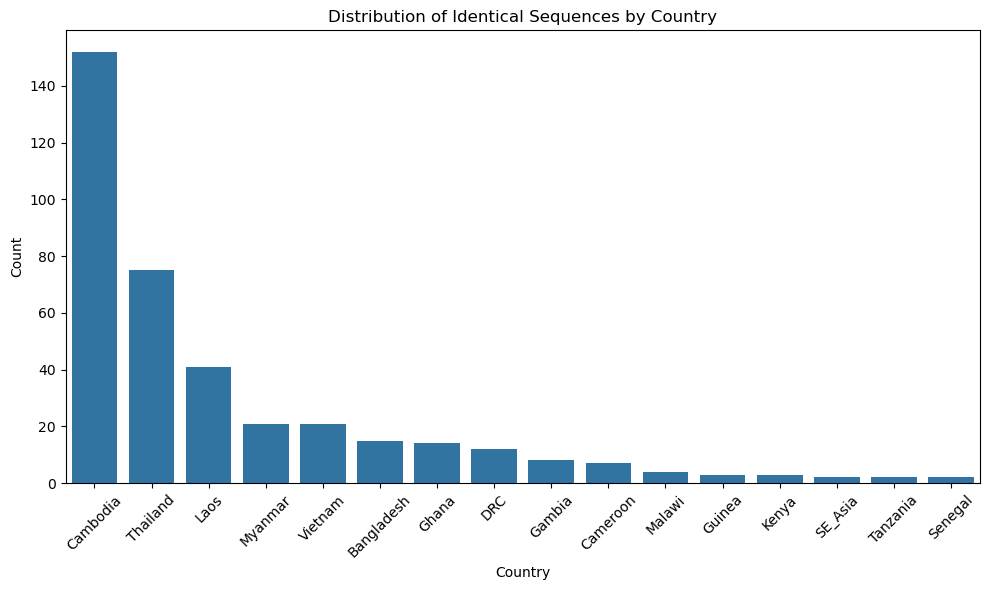

In [50]:
if 'Country' in identical_seq_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=identical_seq_df, x='Country', order=identical_seq_df['Country'].value_counts().index)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.title('Distribution of Identical Sequences by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("No 'country' column found in identical_seq_df.")

/tmp/ipykernel_19536/3423476621.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




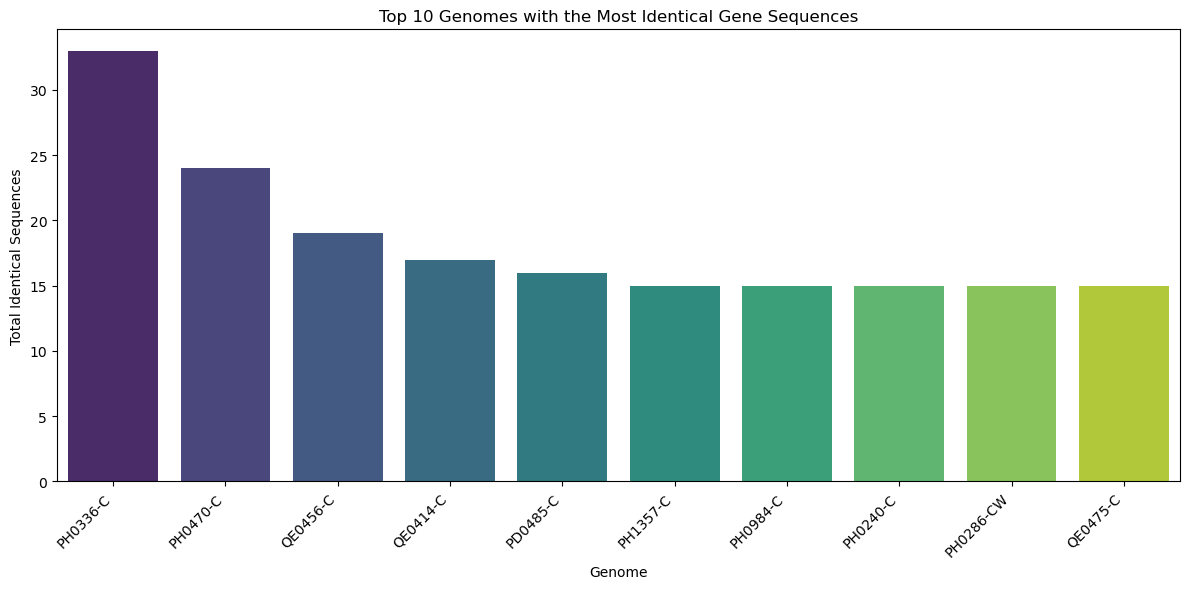

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Genome' and sum the 'count' values to get the total identical sequences per genome
genome_counts = identical_seq_df.groupby('Genome')['count'].sum().reset_index()

# Sort the data by 'count' in descending order
genome_counts = genome_counts.sort_values(by='count', ascending=False)

# Select the top 10 genomes
top_10_genomes = genome_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genomes, x='Genome', y='count', palette='viridis')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Genome')
plt.ylabel('Total Identical Sequences')
plt.title('Top 10 Genomes with the Most Identical Gene Sequences')

# Display the plot
plt.tight_layout()
plt.show()

In [68]:
# Want to extract domain sequences as a fasta file.
# Tell python to do this!

# Create fasta file based on sequences

merged_df = pd.read_csv('fullDC13_merged_df.csv')

with open('DC13_wholeseq.fasta','w') as file:
    for seq_id, seq in zip(merged_df['sequence_id'], merged_df['sequence']):
        file.write(f'>{seq_id}\n{seq}\n')